In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from tribus import run_tribus, heatmap_for_median_expression, umap_vis

In [ ]:
# if save session
import dill
dill.dump_session('TMA_notebook_env.db')

In [2]:
# restore session
import dill
dill.load_session('TMA_notebook_env.db')

In [4]:
sample_data = pd.read_csv(r'C:\Users\Public\Farkkila_lab_datasets\Tribus\Test_case_data\TMA_works\TMA_all_data.csv', 
                          index_col=0)
df = pd.ExcelFile(r"C:\Users\Public\Farkkila_lab_datasets\Tribus\Test_case_data\TMA_works\cell_type_descriptions_new.xlsx")
logic = pd.read_excel(df, df.sheet_names, index_col=0)

In [5]:
labels, scores = run_tribus(sample_data, logic, depth=2) # modify depth

Global, subsetting done
Global
Global, clustering done
Tumor, subsetting done
Tumor
Tumor, clustering done
Myeloid, subsetting done
Myeloid
less than min sample_size
Myeloid, clustering done
Lymphoid, subsetting done
Lymphoid
less than min sample_size
Lymphoid, clustering done
Stromal, subsetting done
Stromal
less than min sample_size
Stromal, clustering done


In [6]:
labels.head(10)

Global                     Tumor Myeloid Lymphoid   
ROW_ID                                                                
1                  Tumor               Mesenchymal     NaN      NaN  \
2       undefined_Global                       NaN     NaN      NaN   
3       undefined_Global                       NaN     NaN      NaN   
4                  Tumor  Proliferating epithelial     NaN      NaN   
5       undefined_Global                       NaN     NaN      NaN   
6                  Tumor                 Senescent     NaN      NaN   
7                Stromal                       NaN     NaN      NaN   
8                  Tumor                Epithelial     NaN      NaN   
9       undefined_Global                       NaN     NaN      NaN   
10      undefined_Global                       NaN     NaN      NaN   

              Stromal               final_label  
ROW_ID                                           
1                 NaN               Mesenchymal  
2                 NaN          undefined_Global  
3                 NaN          undefined_Global  
4                 NaN  Proliferating epithelial  
5                 NaN          undefined_Global  
6                 NaN                 Senescent  
7       High-Vimentin             High-Vimentin  
8                 NaN                Epithelial  
9                 NaN          undefined_Global  
10                NaN          undefined_Global

In [7]:
np.unique(labels["final_label"])

array(['B cells', 'CD163+ Macrophage', 'CD163- Macrophage', 'CD4 T cells',
       'CD8 T cells', 'Dendritic cells', 'EMT', 'Endothelial',
       'Epithelial', 'High-P21', 'High-Vimentin', 'Mesenchymal',
       'Proliferating EMT', 'Proliferating epithelial',
       'Proliferative stroma', 'Senescent', 'T Reg cells',
       'undefined_Global', 'undefined_Lymphoid', 'undefined_Myeloid',
       'undefined_Stromal', 'undefined_Tumor'], dtype=object)

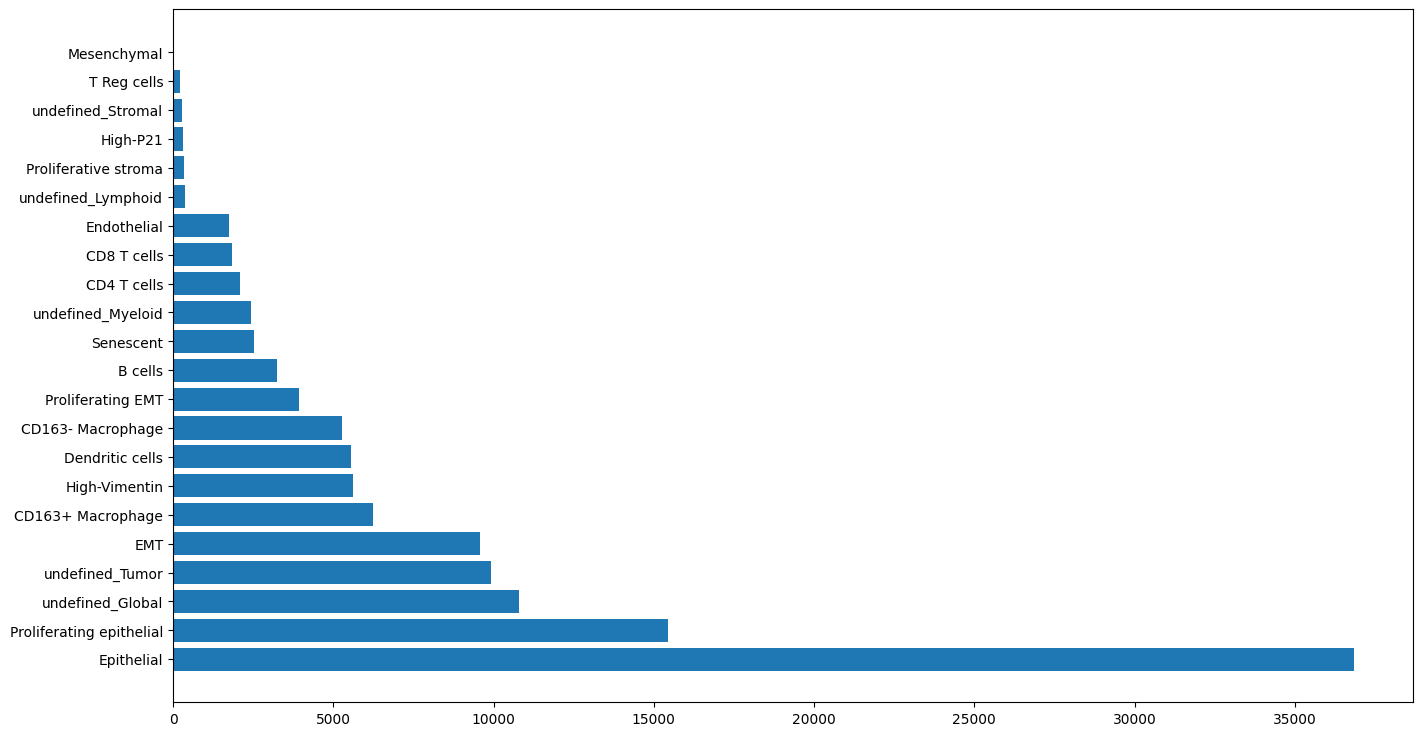

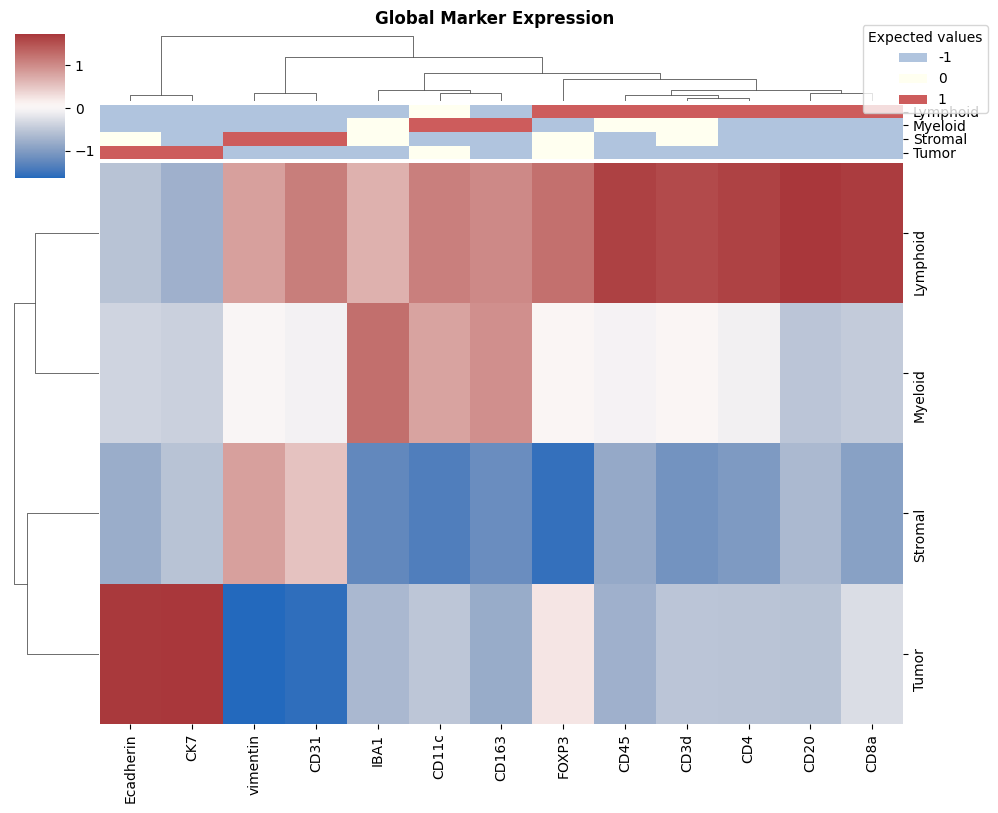

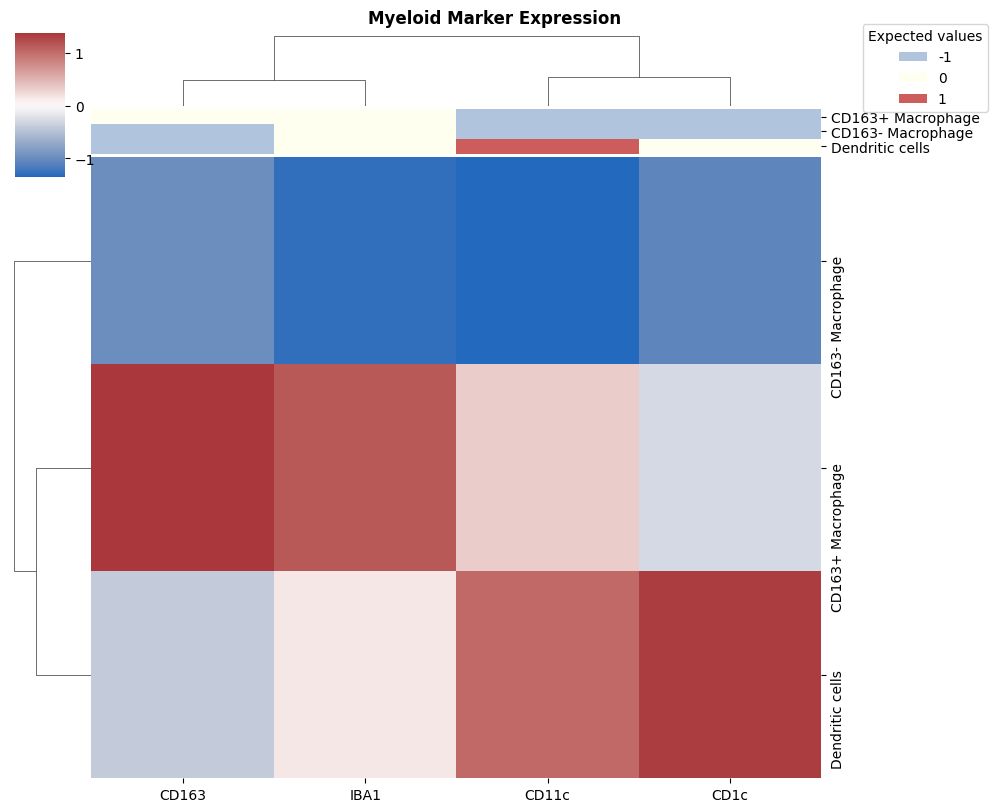

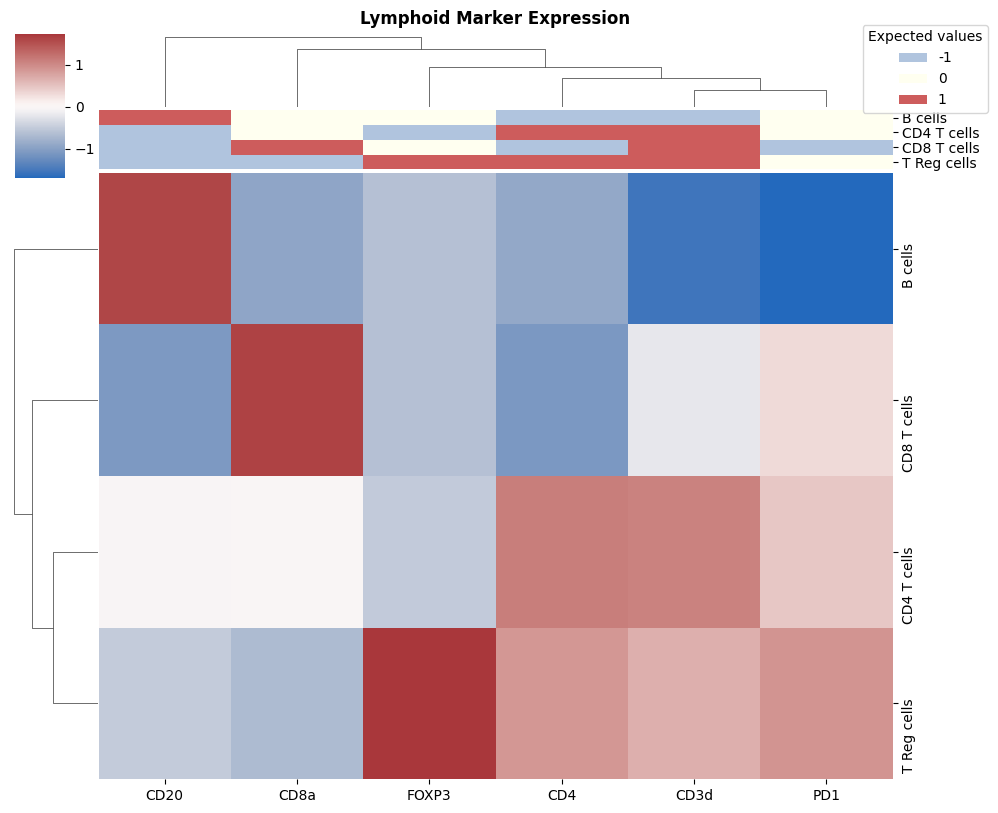

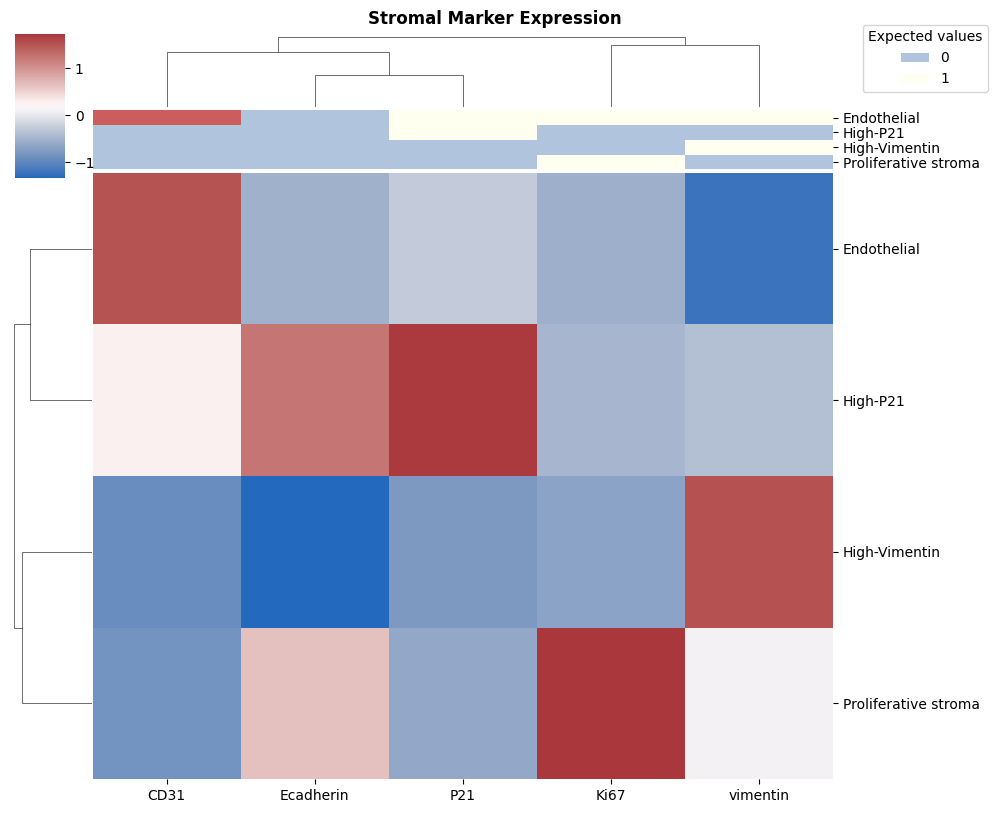

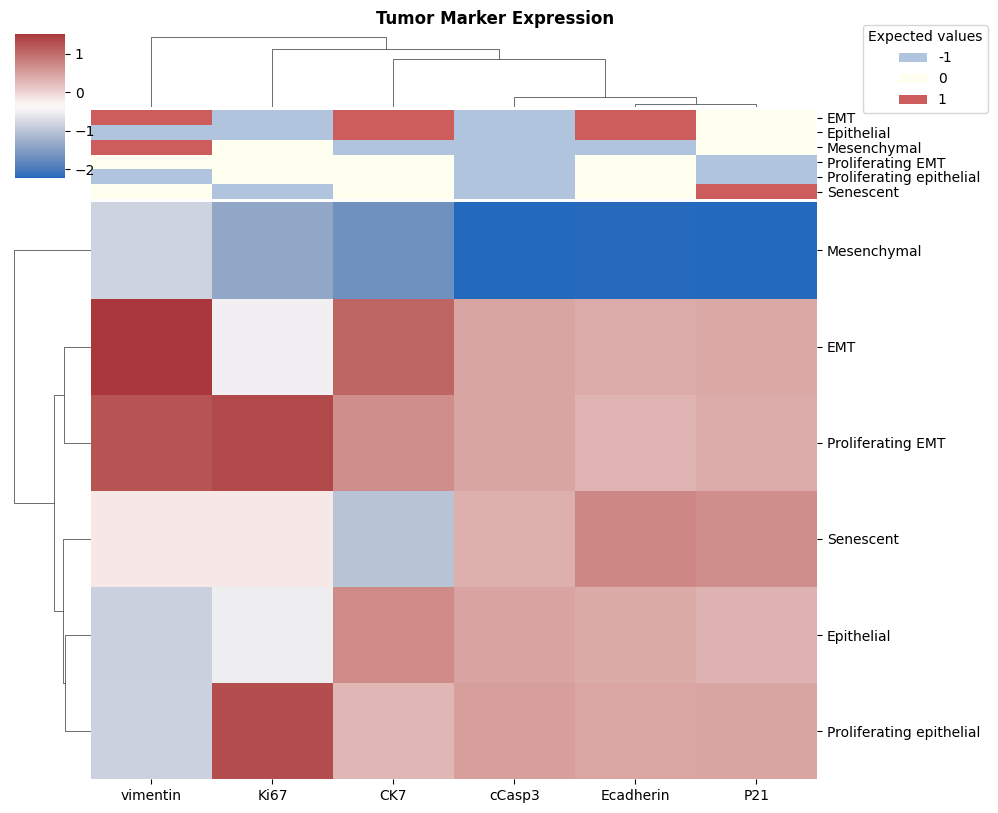

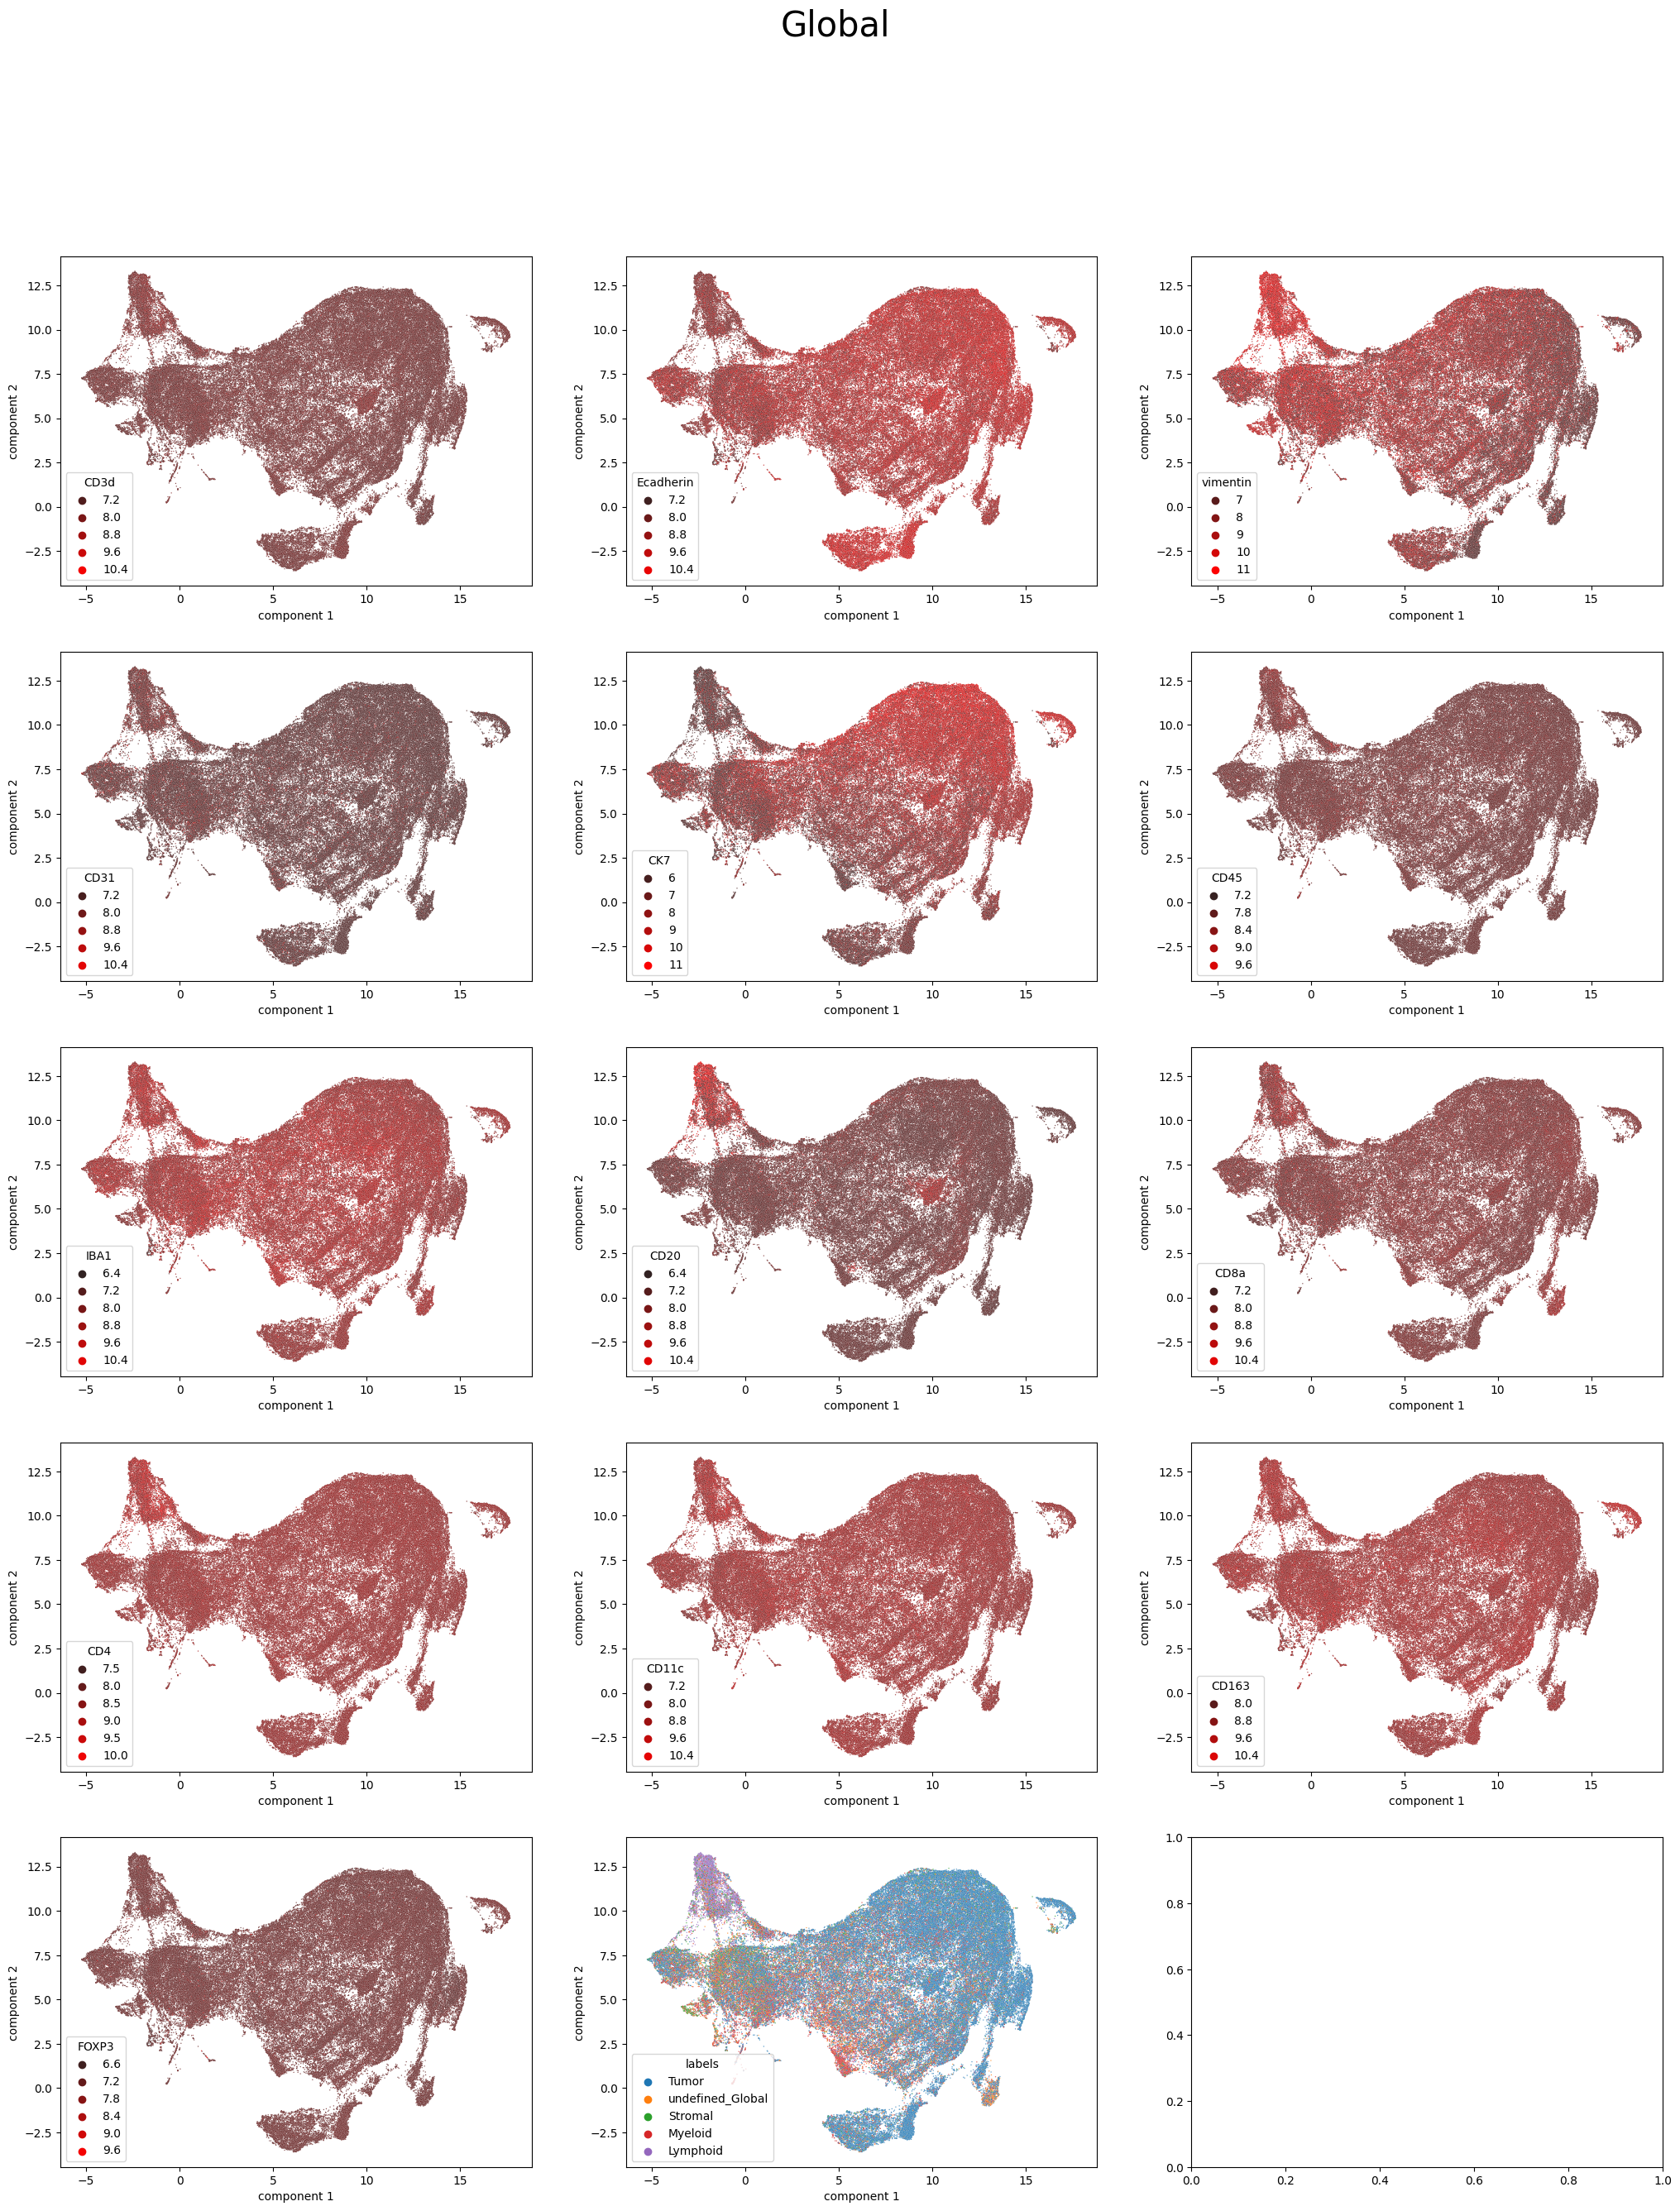

In [9]:
# Barplot, show the number of cells in each type
label_stat = labels["final_label"].value_counts().rename_axis('final_label').reset_index(name='count')
name = label_stat['final_label']
num = label_stat['count']
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(name, num)

# Marker Expression heatmap (use median value)

heatmap_for_median_expression(sample_data, labels, logic, level="Global", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Global Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Myeloid", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Myeloid Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Lymphoid", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Lymphoid Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Stromal", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Stromal Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)

heatmap_for_median_expression(sample_data, labels, logic, level="Tumor", save=False, fname=None,
                                  dpi='figure', transform=stats.zscore, title="Tumor Marker Expression",
                                  c_palette=sns.color_palette(['lightsteelblue', 'ivory', 'indianred'], 3),
                                  cmap_='vlag', dendrogram_ratio_=0.1)


# time consuming
umap_vis(sample_data, labels, markers=logic["Global"].index.values.tolist(), save=False, fname=None,  level="Global", title=None, init='spectral',
             random_state=0, n_neighbors=10, min_dist=0.1, metric='correlation', palette_markers='mycolormap',
             palette_cell='tab10', dpi='figure')

In [8]:
labels.to_csv(r"C:\Users\Public\Farkkila_lab_datasets\Tribus\Test_case_data\TMA_works\TMA_celltyping.csv")